In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('Exercise_TRAINING.csv')
test = pd.read_csv('Exercise_TEST.csv')

In [3]:
train.shape

(11588, 24)

In [4]:
test.shape

(4402, 24)

In [5]:
train.head()

,PropertyID,SaleDollarCnt,TransDate,censusblockgroup,ZoneCodeCounty,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,...,Latitude,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge
0,48648941,285000.0,5/23/2015,5.300000e+11,R7,9,4.0,2.00,1900.0,480.0,...,47321389,-122213716,107800.0,844.0,1975.0,0.6685,0.0780,42854,0.1924,48.6
1,48648982,309950.0,8/22/2015,5.300000e+11,R8P,9,3.0,2.00,2170.0,320.0,...,47482082,-122244269,181500.0,925.0,1969.0,0.5753,0.0192,54013,0.3718,42.6
2,48649024,476000.0,8/27/2015,5.300000e+11,SF 7200,9,4.0,1.00,2150.0,590.0,...,47561383,-122308083,344300.0,733.0,1946.0,0.6331,0.0000,56782,0.3207,40.7
3,48649040,324950.0,7/1/2015,5.300000e+11,R1,9,4.0,2.25,2560.0,NaN,...,47387929,-122279389,284200.0,900.0,1977.0,0.5456,0.0573,44200,0.3359,40.0
4,48649057,325000.0,6/20/2015,5.300000e+11,LDR,9,4.0,1.75,1720.0,NaN,...,47477068,-122263852,290100.0,802.0,1972.0,0.4267,0.0551,65282,0.1633,44.4


In [6]:
train_PropertyID = train['PropertyID']
test_PropertyID = test['PropertyID']
del train['PropertyID']
del test['PropertyID']

In [7]:
train_data_na = (train.isnull().sum() / len(train)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data.head(20)

,Missing Ratio
ViewType,77.286848
GarageSquareFeet,24.516741
BGMedRent,22.704522
BGMedYearBuilt,2.131515
BGMedHomeValue,0.051778


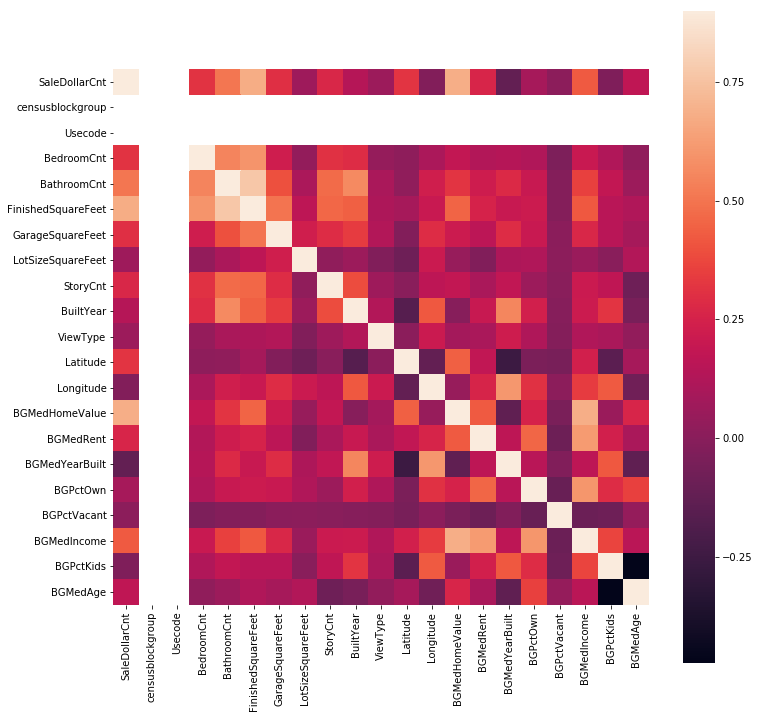

In [8]:
import seaborn as sns
#Correlation map to see how features are correlated with score
corrmat = train.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [9]:
del train['ViewType']
del test['ViewType']

In [10]:
train.dtypes

SaleDollarCnt         float64
TransDate              object
censusblockgroup      float64
ZoneCodeCounty         object
Usecode                 int64
BedroomCnt            float64
BathroomCnt           float64
FinishedSquareFeet    float64
GarageSquareFeet      float64
LotSizeSquareFeet       int64
StoryCnt              float64
BuiltYear             float64
Latitude                int64
Longitude               int64
BGMedHomeValue        float64
BGMedRent             float64
BGMedYearBuilt        float64
BGPctOwn              float64
BGPctVacant           float64
BGMedIncome             int64
BGPctKids             float64
BGMedAge              float64
dtype: object

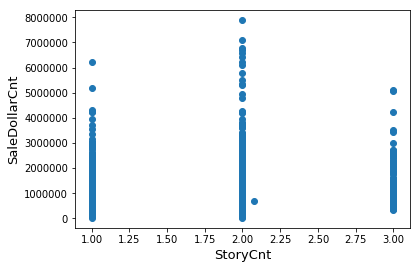

In [11]:
fig,ax = plt.subplots()
ax.scatter(x = train['StoryCnt'], y = train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('StoryCnt', fontsize=13)
plt.show()

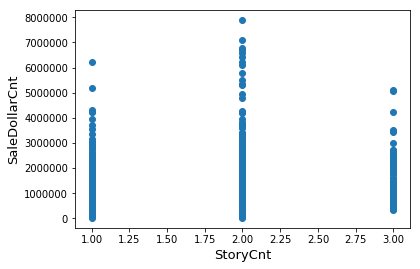

In [12]:
#Deleting outliers
train = train.drop(train[(train['StoryCnt']>2)& (train['StoryCnt']<2.25)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['StoryCnt'], train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('StoryCnt', fontsize=13)
plt.show()

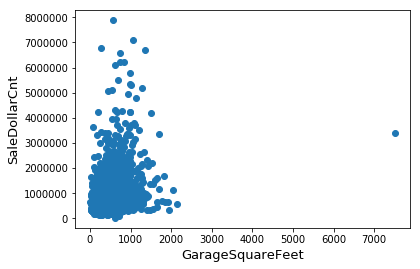

In [13]:
fig,ax = plt.subplots()
ax.scatter(x = train['GarageSquareFeet'], y = train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('GarageSquareFeet', fontsize=13)
plt.show()

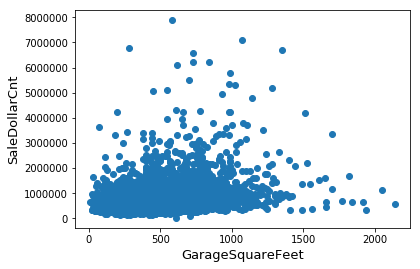

In [14]:
#Deleting outliers
train = train.drop(train[(train['GarageSquareFeet']>3000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GarageSquareFeet'], train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('GarageSquareFeet', fontsize=13)
plt.show()

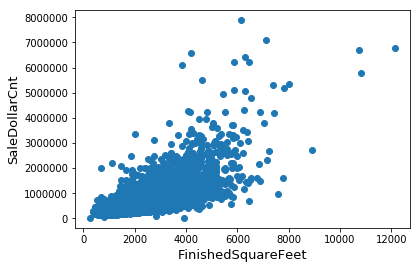

In [15]:
fig,ax = plt.subplots()
ax.scatter(x = train['FinishedSquareFeet'], y = train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('FinishedSquareFeet', fontsize=13)
plt.show()

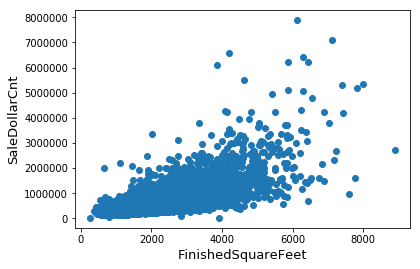

In [16]:
#Deleting outliers
train = train.drop(train[(train['FinishedSquareFeet']>10000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['FinishedSquareFeet'], train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('FinishedSquareFeet', fontsize=13)
plt.show()

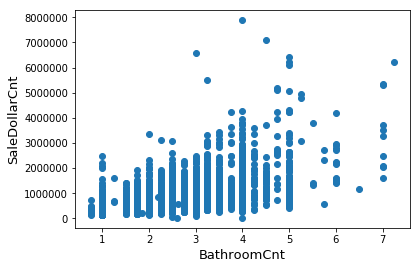

In [17]:
fig,ax = plt.subplots()
ax.scatter(x = train['BathroomCnt'], y = train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('BathroomCnt', fontsize=13)
plt.show()

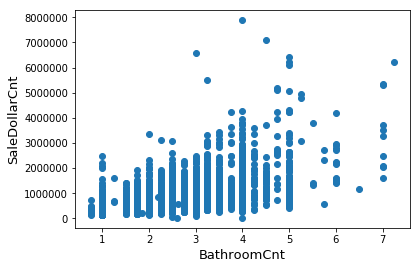

In [18]:
#Deleting outliers
train = train.drop(train[(train['BathroomCnt']>8)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['BathroomCnt'], train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('BathroomCnt', fontsize=13)
plt.show()

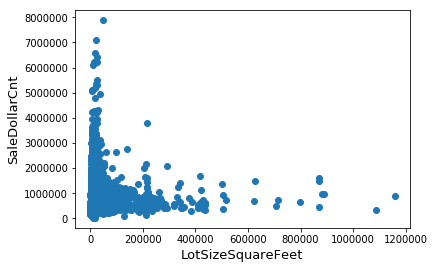

In [19]:
fig,ax = plt.subplots()
ax.scatter(x = train['LotSizeSquareFeet'], y = train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('LotSizeSquareFeet', fontsize=13)
plt.show()

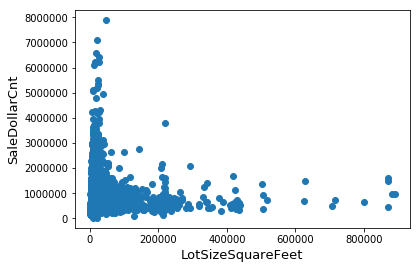

In [20]:
#Deleting outliers
train = train.drop(train[(train['LotSizeSquareFeet']>1000000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['LotSizeSquareFeet'], train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('LotSizeSquareFeet', fontsize=13)
plt.show()

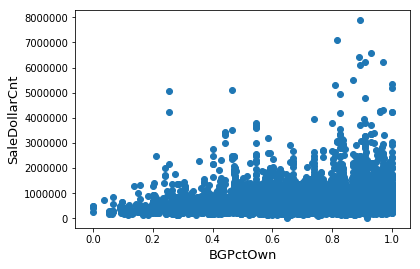

In [21]:
fig,ax = plt.subplots()
ax.scatter(x = train['BGPctOwn'], y = train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('BGPctOwn', fontsize=13)
plt.show()

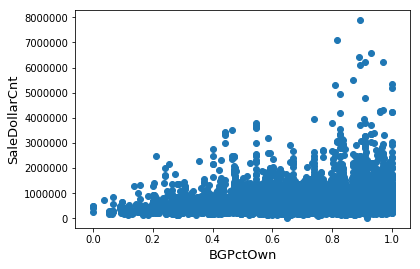

In [22]:
#Deleting outliers
train = train.drop(train[(train['BGPctOwn']<0.5)& (train['SaleDollarCnt']>4000000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['BGPctOwn'], train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('BGPctOwn', fontsize=13)
plt.show()

In [23]:
train['SaleDollarCnt'].corr(train['BGPctOwn'])

0.10327492939000844

In [24]:
train['SaleDollarCnt'].corr(train['BGPctVacant'])

0.007201354633381722

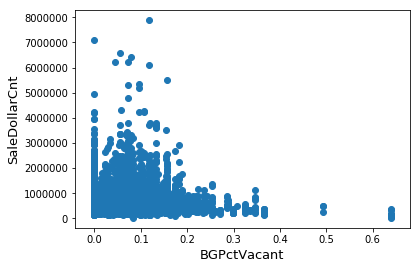

In [25]:
fig,ax = plt.subplots()
ax.scatter(x = train['BGPctVacant'], y = train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('BGPctVacant', fontsize=13)
plt.show()

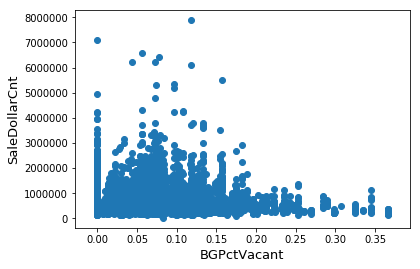

In [26]:
#Deleting outliers
train = train.drop(train[(train['BGPctVacant']>0.45)& (train['SaleDollarCnt']<2000000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['BGPctVacant'], train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('BGPctVacant', fontsize=13)
plt.show()

In [27]:
train['SaleDollarCnt'].corr(train['BGPctVacant'])

0.015465512804087263

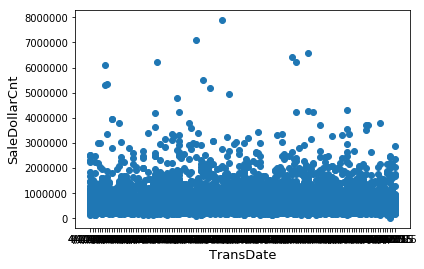

In [28]:
fig,ax = plt.subplots()
ax.scatter(x = train['TransDate'], y = train['SaleDollarCnt'])
plt.ylabel('SaleDollarCnt', fontsize=13)
plt.xlabel('TransDate', fontsize=13)
plt.show()

In [29]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SaleDollarCnt.values
Y_SaleDollarCnt=y_train
y_train=np.log1p(y_train)

In [30]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SaleDollarCnt'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (15969, 21)


In [31]:
#Dealing with missing Data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
GarageSquareFeet,24.854405
BGMedRent,22.499843
BGMedYearBuilt,1.934999
BGMedHomeValue,0.062621


In [32]:
train.dtypes

SaleDollarCnt         float64
TransDate              object
censusblockgroup      float64
ZoneCodeCounty         object
Usecode                 int64
BedroomCnt            float64
BathroomCnt           float64
FinishedSquareFeet    float64
GarageSquareFeet      float64
LotSizeSquareFeet       int64
StoryCnt              float64
BuiltYear             float64
Latitude                int64
Longitude               int64
BGMedHomeValue        float64
BGMedRent             float64
BGMedYearBuilt        float64
BGPctOwn              float64
BGPctVacant           float64
BGMedIncome             int64
BGPctKids             float64
BGMedAge              float64
dtype: object

In [33]:
train["GarageSquareFeet"] = train["GarageSquareFeet"].fillna(0)
train["BGMedRent"] = train["BGMedRent"].fillna(0)
train["BGMedYearBuilt"] = train["BGMedYearBuilt"].fillna(train['BGMedYearBuilt'].mode()[0])
train["BGMedHomeValue"] = train["BGMedHomeValue"].fillna(0)
test["GarageSquareFeet"] = test["GarageSquareFeet"].fillna(0)
test["BGMedRent"] = test["BGMedRent"].fillna(0)
test["BGMedYearBuilt"] = test["BGMedYearBuilt"].fillna(test['BGMedYearBuilt'].mode()[0])
test["BGMedHomeValue"] = test["BGMedHomeValue"].fillna(0)

In [34]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SaleDollarCnt'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (15969, 21)


In [35]:
#Dealing with missing Data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [36]:
all_data['BuiltYear'] = all_data['BuiltYear'].astype('int64')
all_data['BuiltYear'] = all_data['BuiltYear'].astype('str')
all_data['BGMedYearBuilt'] = all_data['BGMedYearBuilt'].astype('int64')
all_data['BGMedYearBuilt'] = all_data['BGMedYearBuilt'].astype('str')
all_data['censusblockgroup'] = all_data['censusblockgroup'].astype('str')
all_data['Usecode'] = all_data['Usecode'].astype('str')
all_data['Longitude']= all_data['Longitude'].astype('float64')
all_data['Latitude']= all_data['Latitude'].astype('float64')

In [37]:
del all_data['TransDate']

In [38]:
#del all_data['BGPctVacant']
del all_data['Longitude']

In [39]:
#Dealing with missing Data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [40]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

numeric_feats
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
LotSizeSquareFeet,10.691812
BGPctVacant,1.848875
FinishedSquareFeet,1.176488
BGMedHomeValue,1.122004
BGMedIncome,0.722271
BathroomCnt,0.521282
BGMedAge,0.444676
BedroomCnt,0.442747
BGPctKids,0.406840
GarageSquareFeet,0.370614


In [41]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 14 skewed numerical features to Box Cox transform


In [42]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(15969, 393)


In [43]:
all_data.head()

,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,StoryCnt,Latitude,BGMedHomeValue,BGMedRent,BGPctOwn,...,BGMedYearBuilt_1996,BGMedYearBuilt_1997,BGMedYearBuilt_1998,BGMedYearBuilt_1999,BGMedYearBuilt_2000,BGMedYearBuilt_2001,BGMedYearBuilt_2002,BGMedYearBuilt_2003,BGMedYearBuilt_2004,BGMedYearBuilt_2005
0,1.820334,1.194318,14.023122,10.169007,18.744237,0.730463,87.775809,31.247556,11.653830,0.532093,...,0,0,0,0,0,0,0,0,0,0
1,1.540963,1.194318,14.439420,9.178051,21.309826,0.730463,87.823846,34.329249,11.907117,0.470293,...,0,0,0,0,0,0,0,0,0,0
2,1.820334,0.730463,14.410140,10.697217,18.213642,0.730463,87.847501,38.461686,11.270884,0.508974,...,0,0,0,0,0,0,0,0,0,0
3,1.820334,1.289269,14.968995,0.000000,21.750137,0.730463,87.795717,37.181615,11.831022,0.449946,...,0,0,0,0,0,0,0,0,0,0
4,1.820334,1.092385,13.716698,0.000000,19.289610,1.194318,87.822349,37.316969,11.514262,0.365006,...,0,0,0,0,0,0,0,0,0,0


In [44]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [45]:
train.shape

(11567, 393)

In [46]:
all_data.to_csv("data_processed_zillow.csv")

In [47]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [48]:

# Validation function
n_folds = 5

# cross_val_score function of Sklearn.
def rmsle_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train.values, 
                y_train, scoring="neg_mean_squared_error", cv = n_folds))
    return(rmse)


In [49]:
def Avg_absolute_percentage_error(y_true, y_pred): 
    
    return (np.mean(np.abs((y_true - y_pred) / y_true)))


def function1(model):
    aape=[]
    fold = KFold(n_folds, shuffle=True, 
                   random_state=100)
    for train_index, test_index in fold.split(train.values):
        X_train, X_test = train.iloc[train_index], train.iloc[test_index]
        y_true, y_test = y_train[train_index], y_train[test_index]
        model.fit(X_train, y_true)
        model_pred = np.expm1(model.predict(X_test))
        aape.append(Avg_absolute_percentage_error(np.expm1(y_test),model_pred))
    return sum(aape) / len(aape)

    

In [50]:
def function2(model1,model2):
    aape=[]
    fold = KFold(n_folds, shuffle=True, 
                   random_state=100)
    for train_index, test_index in fold.split(train.values):
        X_train, X_test = train.iloc[train_index], train.iloc[test_index]
        y_true, y_test = y_train[train_index], y_train[test_index]
        model1.fit(X_train, y_true)
        model1_pred = np.expm1(model1.predict(X_test))
        model2.fit(X_train, y_true)
        model2_pred = np.expm1(model2.predict(X_test))
        ensemble=0.45*model1_pred+0.55*model2_pred
        aape.append(Avg_absolute_percentage_error(np.expm1(y_test),ensemble))
    return sum(aape) / len(aape)


In [51]:
def function3(model1,model2,model3):
    aape=[]
    fold = KFold(n_folds, shuffle=True, 
                   random_state=100)
    for train_index, test_index in fold.split(train.values):
        X_train, X_test = train.iloc[train_index], train.iloc[test_index]
        y_true, y_test = y_train[train_index], y_train[test_index]
        model1.fit(X_train, y_true)
        model1_pred = np.expm1(model1.predict(X_test))
        model2.fit(X_train, y_true)
        model2_pred = np.expm1(model2.predict(X_test))
        model3.fit(X_train, y_true)
        model3_pred = np.expm1(model3.predict(X_test))
        ensemble=0.55*model2_pred+0.10*model1_pred+0.35*model3_pred
        aape.append(Avg_absolute_percentage_error(np.expm1(y_test),ensemble))
    return sum(aape) / len(aape)


In [52]:
# XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.5, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1, n_estimators=4000,
                             reg_alpha=0.4, reg_lambda=0.8,
                             subsample=0.5, silent=1,
                             nthread=1)

In [327]:
score = rmsle_cv(model_xgb)
print("XGB score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

XGB score: 0.1866 (0.0051)



In [53]:
# Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=3)

In [329]:
score = rmsle_cv(KRR)
print("KRR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

KRR score: 0.1992 (0.0102)



In [54]:
# Elastic net regression
ENet = make_pipeline(RobustScaler(),ElasticNet(alpha=0.0001, l1_ratio=.5, random_state=30))

In [55]:
# LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=4000,
                              max_bin = 50, bagging_fraction = 0.9,
                              bagging_freq = 10, feature_fraction = 0.5,
                              feature_fraction_seed=7, bagging_seed=7,
                              min_data_in_leaf=5, min_sum_hessian_in_leaf=15)


In [56]:
score = rmsle_cv(model_lgb)
print("LightGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LightGBM score: 0.1822 (0.0058)



In [58]:
# Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [59]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1807 (0.0059)



In [60]:
# lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0001, random_state=2))

In [61]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

Lasso score: 0.2131 (0.0085)



In [62]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [338]:
print("AAPE for XGBoost:",function1(model_xgb))

AAPE for XGBoost: 0.13237407667586443


In [63]:
score = rmsle_cv(ENet)
print("ENet score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

ENet score: 0.2134 (0.0089)



In [64]:
print("AAPE for ENet:",function1(ENet))

AAPE for ENet: 0.14992587493363166


In [65]:
print("AAPE for Lasso:",function1(lasso))

AAPE for Lasso: 0.1502296842444727


In [66]:
print("AAPE for LightGBM:",function1(model_lgb))

AAPE for LightGBM: 0.12422754022042845


In [343]:
print("AAPE for KRR:",function1(KRR))

AAPE for KRR: 0.13737026450451859


In [67]:
print("AAPE for GBoost:",function1(GBoost))

AAPE for GBoost: 0.1193563245973828


In [68]:
# Stacking averaged Models Class
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # fit the data on clones of the original models again
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=100)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [69]:
stacked_averaged_models = StackingAveragedModels(base_models = (GBoost,model_lgb),
                                                 meta_model = ENet)

In [348]:
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1778 (0.0056)


In [70]:
# Stacking averaged Models Class for calculating aape
class StackingAveragedModels1(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # fit the data on clones of the original models again
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=100)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [71]:
stacked_averaged_models1 = StackingAveragedModels1(base_models = (GBoost,model_lgb),
                                                 meta_model = ENet)

In [358]:
print("AAPE for stacked_averaged_models:",function1(stacked_averaged_models1))

AAPE for stacked_averaged_models: 0.1189998552730294


In [73]:
results = pd.DataFrame()
results['PropertyID'] = test_PropertyID
results['SaleDollarCnt'] = stacked_pred
results.to_csv('zillow_result.csv',index=False)

In [76]:
###End###